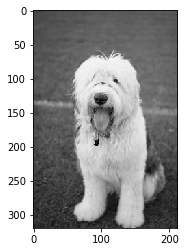

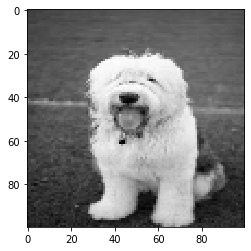

1850
1
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
1
1
1
1


In [3]:

import cv2
import numpy as np
import os
from random import shuffle
import matplotlib.pyplot as plt

DATADIR = "C:/Users/Ekta Gupta/Desktop/DOG" #GIVE YOUR OWN PATH
CATEGORIES = ["Tongue","Closed"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category) #joins our path to cat and dog directory
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array , cmap="gray")
        plt.show()
        break
    break


IMG_SIZE = 100
new_array= cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
plt.imshow(new_array , cmap='gray')
plt.show()

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) #joins our path to cat and dog directory
        class_num= CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array= cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()


print(len(training_data))

import random

random.shuffle(training_data)

for sample in training_data[:20]:
    print(sample[1])


A = []
b = []
for features , label in training_data:
    A.append(features)
    b.append(label)
    
A = np.array(A).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


import pickle


pickle_out=open("A.pickle","wb")
pickle.dump(A, pickle_out)
pickle_out.close()

pickle_out=open("b.pickle","wb")
pickle.dump(b, pickle_out)
pickle_out.close()
pickle_in = open("A.pickle","rb")
A = pickle.load(pickle_in)


In [4]:
#TRAINING THE DATA
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import pickle

A= pickle.load(open("A.pickle","rb"))
b= pickle.load(open("b.pickle","rb"))

A=A/255.0

model = Sequential()
model.add(Conv2D(64 ,(3,3) , input_shape=A.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64 ,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

model.fit(A,b,batch_size=2 ,epochs=32, validation_split=0.1)

model.save('saved')

Train on 1665 samples, validate on 185 samples
Epoch 1/32
1665/1665 [==============================] - 35s 21ms/sample - loss: 0.7075 - acc: 0.4913 - val_loss: 0.6924 - val_acc: 0.5189
Epoch 2/32
1665/1665 [==============================] - 37s 22ms/sample - loss: 0.6951 - acc: 0.5291 - val_loss: 0.6897 - val_acc: 0.5946
Epoch 3/32
1665/1665 [==============================] - 34s 20ms/sample - loss: 0.6721 - acc: 0.5868 - val_loss: 0.6547 - val_acc: 0.6108
Epoch 4/32
1665/1665 [==============================] - 34s 20ms/sample - loss: 0.5808 - acc: 0.6979 - val_loss: 0.6542 - val_acc: 0.6432
Epoch 5/32
1665/1665 [==============================] - 34s 20ms/sample - loss: 0.4817 - acc: 0.7772 - val_loss: 0.6661 - val_acc: 0.6432
Epoch 6/32
1665/1665 [==============================] - 34s 20ms/sample - loss: 0.3661 - acc: 0.8336 - val_loss: 0.7825 - val_acc: 0.6919
Epoch 7/32
1665/1665 [==============================] - 34s 20ms/sample - loss: 0.2593 - acc: 0.8877 - val_loss: 0.9507 - val

In [7]:
import cv2
import tensorflow as tf

filepath = "E:/2.jpg" #GIVE PATH OF YOUR IMAGE

def prepare(filepath):
    IMG_SIZE = 100  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.


CATEGORIES = ["Tongue","Closed"]# will use this to convert prediction num to string value


model = tf.keras.models.load_model("saved")
#FOLLOWING WILL GIVE YOU PREDICTION

a = model.predict([prepare(filepath)])
print(CATEGORIES[int(a[0][0])])

Tongue
